In [ ]:
# Import core Python libraries for data analysis and visualization
import pandas as pd              # For data manipulation, cleaning, and analysis (DataFrames, CSV handling, etc.)
import matplotlib.pyplot as plt  # For creating visualizations and customizing plots
import seaborn as sns            # For advanced statistical plots with better aesthetics (built on top of matplotlib)


In [70]:
# Load the dataset from the given file path into a Pandas DataFrame
df = pd.read_csv('C:\\Users\\Ant PC\\Downloads\\Test_data.csv')

In [71]:
# Display the first 5 rows of the dataset to quickly inspect the data structure
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [72]:
# Display a concise string summary of the DataFrame, including index, column names, and data types
str(df)

"       employee_id         department     region         education gender  \\\n0             8724         Technology  region_26        Bachelor's      m   \n1            74430                 HR   region_4        Bachelor's      f   \n2            72255  Sales & Marketing  region_13        Bachelor's      m   \n3            38562        Procurement   region_2        Bachelor's      f   \n4            64486            Finance  region_29        Bachelor's      m   \n...            ...                ...        ...               ...    ...   \n23485        53478              Legal   region_2   Below Secondary      m   \n23486        25600         Technology  region_25        Bachelor's      m   \n23487        45409                 HR  region_16        Bachelor's      f   \n23488         1186        Procurement  region_31        Bachelor's      m   \n23489         5973         Technology  region_17  Master's & above      m   \n\n      recruitment_channel  no_of_trainings  age  previous_ye

In [73]:
# Check for missing values in each column and display the total count of nulls per column
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

#### Handling missing values

In [35]:
# Mode imputation for education
education_mode = df['education'].mode()[0]
df['education'] = df['education'].fillna(education_mode)

In [36]:
# Calculate median of previous_year_rating (ignoring NaN values)
median_rating = df['previous_year_rating'].median()

print("Median of previous_year_rating:", median_rating)


Median of previous_year_rating: 3.0


In [37]:
# Impute missing values with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(median_rating)

In [38]:
# Check if nulls are handled
print(df[['education',  'previous_year_rating']].isnull().sum())

education               0
previous_year_rating    0
dtype: int64


In [39]:
# Check total number of duplicate rows
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


##### Why Drop employee_id?

##### It doesn’t carry predictive power (each employee is unique).

##### Keeping it may even hurt your model (the algorithm might treat it as a numeric feature and try to learn meaningless patterns).

In [40]:
# Drop employee_id column

df = df.drop(columns=['employee_id'])

# Confirm it's removed
print(df.columns)


Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')


###### Check Data types
###### Ensure categorical variables are of type object or category.
###### Ensure numerical variables are int or float.

In [41]:
print(df.dtypes)

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [46]:
# Select categorical columns (object or category type)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)


Categorical columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']


#### One-Hot Encoding for all the categorical columns 

In [52]:
# One-hot encode categorical variables
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert any boolean columns to integers
df_encoded = df_encoded.astype(int)

# Check first few rows
print(df_encoded.head())

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   24                     3                  1   
1                1   31                     3                  5   
2                1   31                     1                  4   
3                3   31                     2                  9   
4                1   30                     4                  7   

   KPIs_met >80%  awards_won?  avg_training_score  department_Finance  \
0              1            0                  77                   0   
1              0            0                  51                   0   
2              0            0                  47                   0   
3              0            0                  65                   0   
4              0            0                  61                   1   

   department_HR  department_Legal  ...  region_region_5  region_region_6  \
0              0                 0  ...                0                0  

In [53]:
# Check new shape and columns
print("Shape after encoding:", df_encoded.shape)
print("Encoded columns:\n", df_encoded.columns[:20])  # showing first 20 columns

Shape after encoding: (23490, 53)
Encoded columns:
 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14'],
      dtype='object')


#### Visualize Count Plots & Unique Values to infer from Datasets

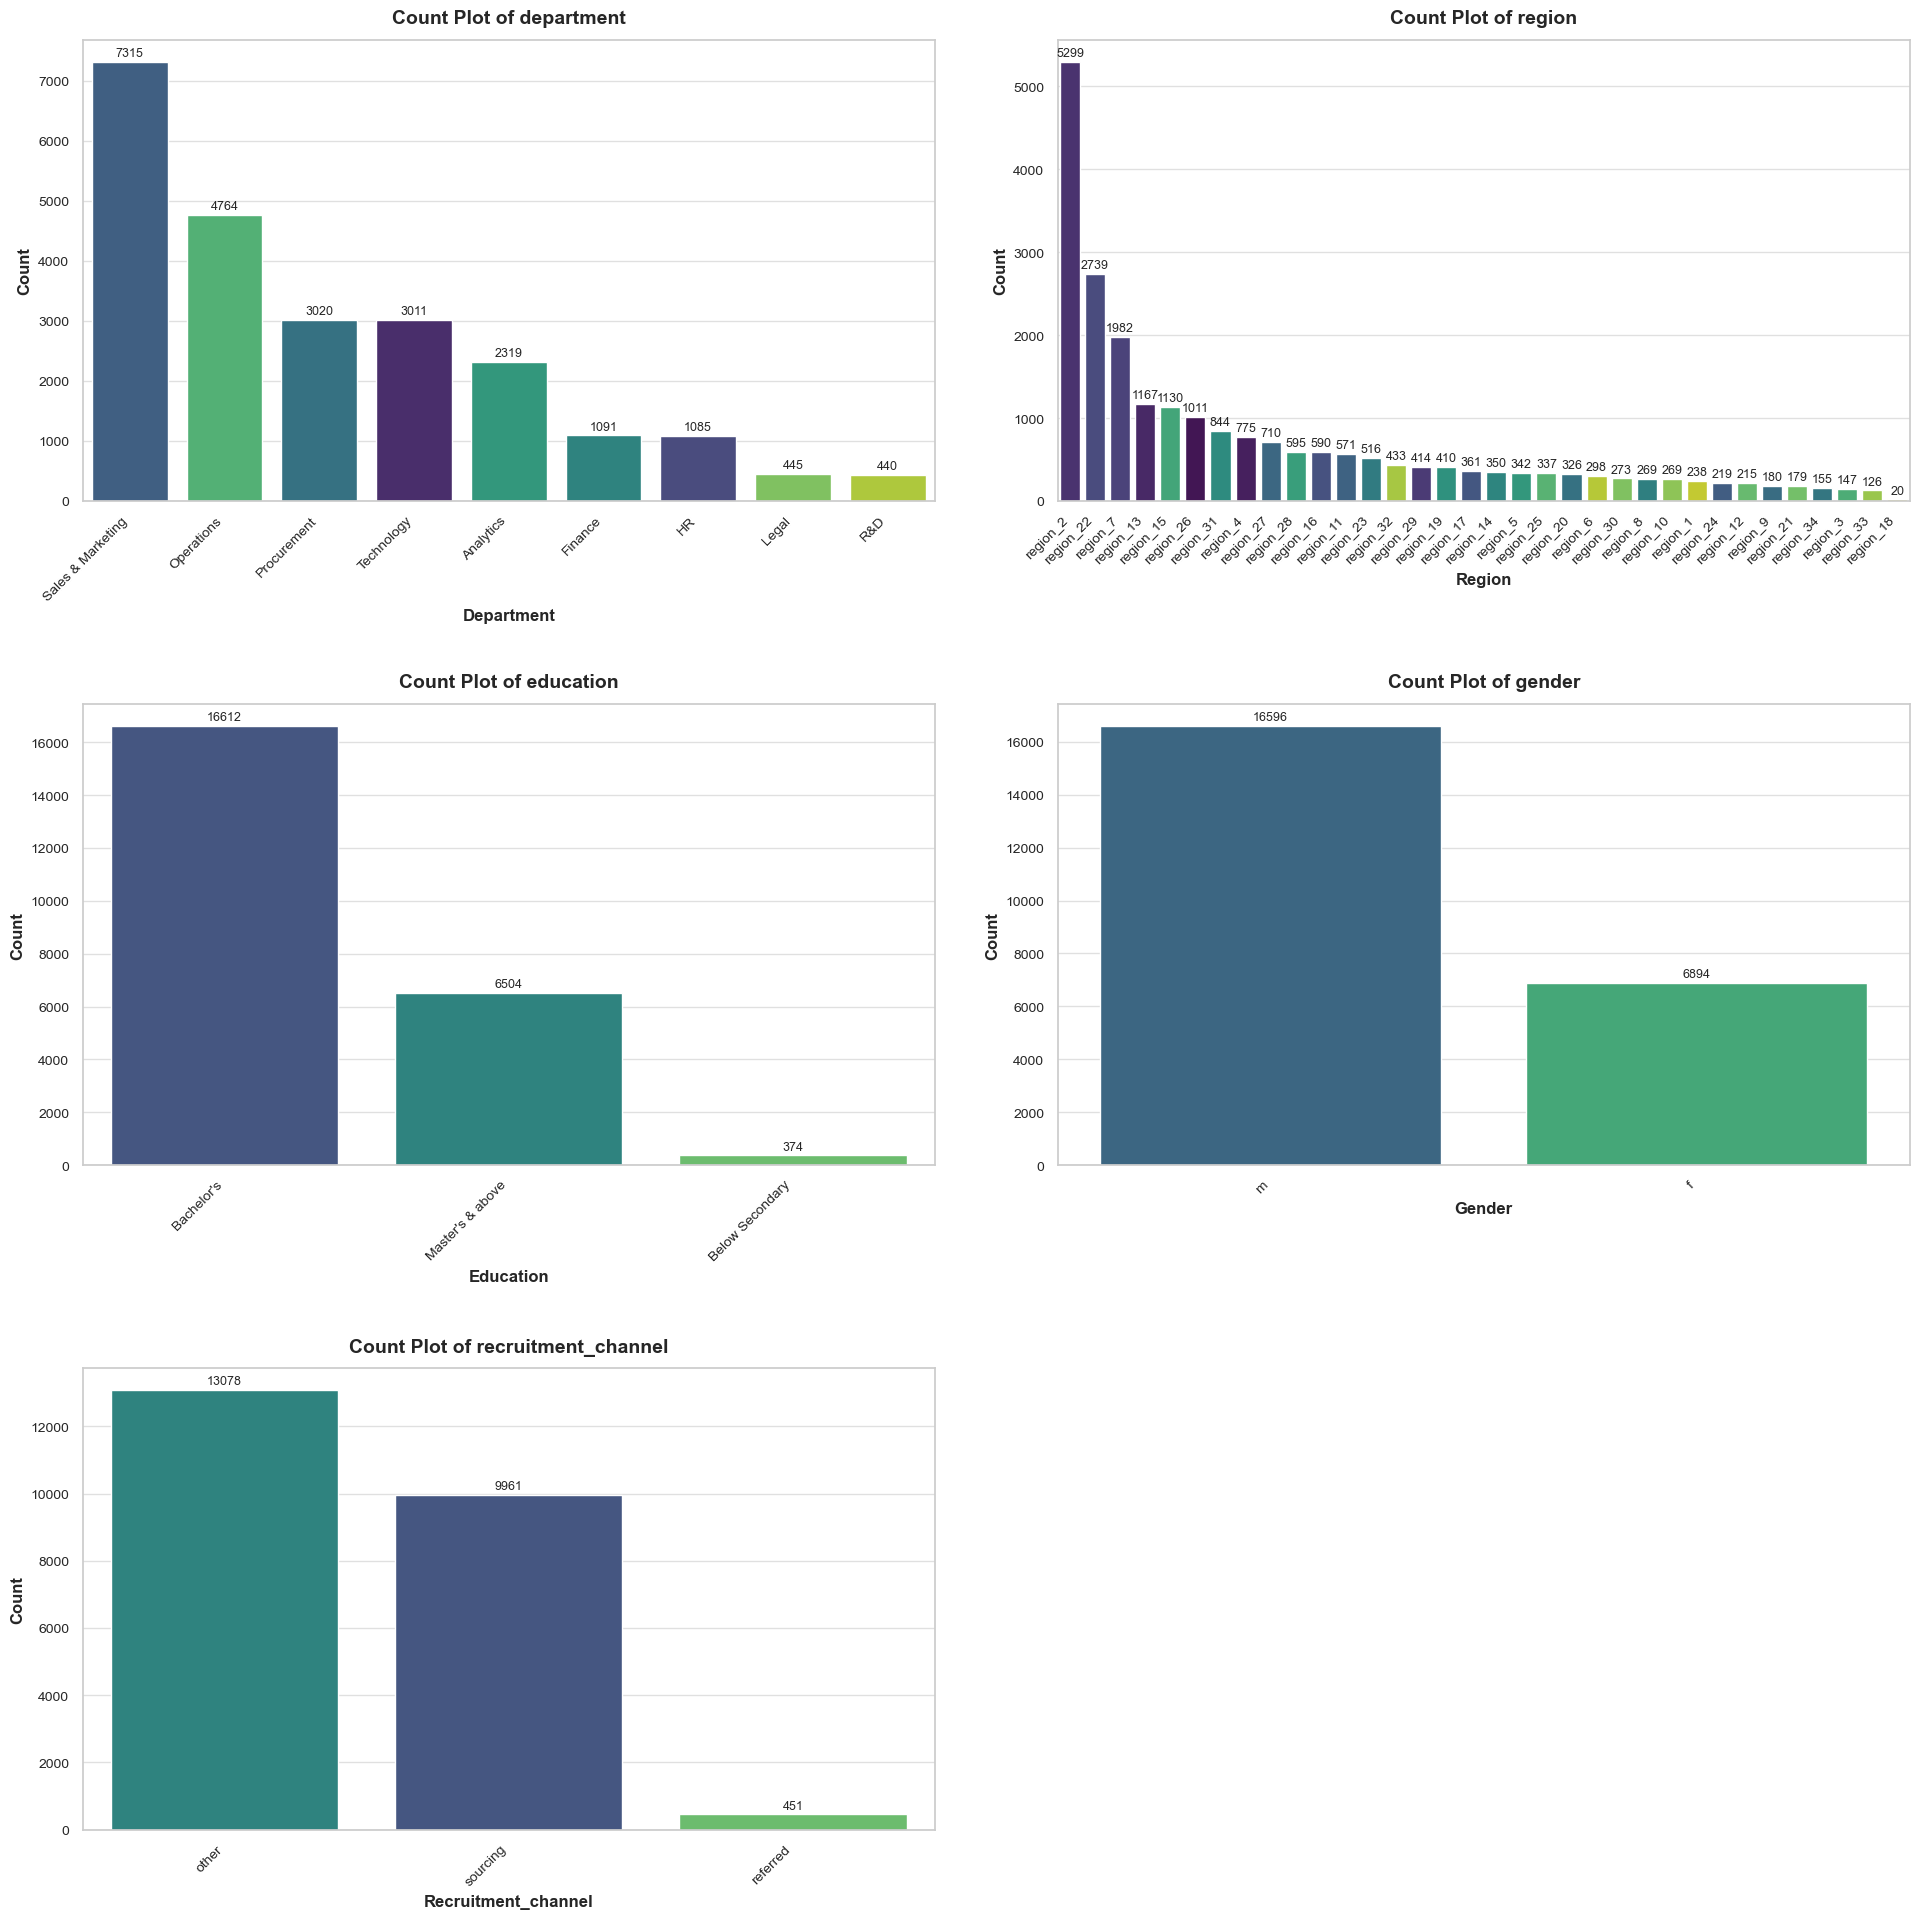

In [69]:
# -----------------------------
# 1. Categorical Variables
# -----------------------------
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Plot categorical distributions
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=col,          # explicitly set hue
        palette="viridis",
        legend=False      # remove redundant legend
    )

    # Add count labels above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=9, padding=2)

    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col.capitalize(), fontsize=12, fontweight="bold")
    plt.ylabel("Count", fontsize=12, fontweight="bold")
    plt.title(f"Count Plot of {col}", fontsize=14, fontweight="bold", pad=12)
    plt.grid(axis="y", linestyle="-", alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

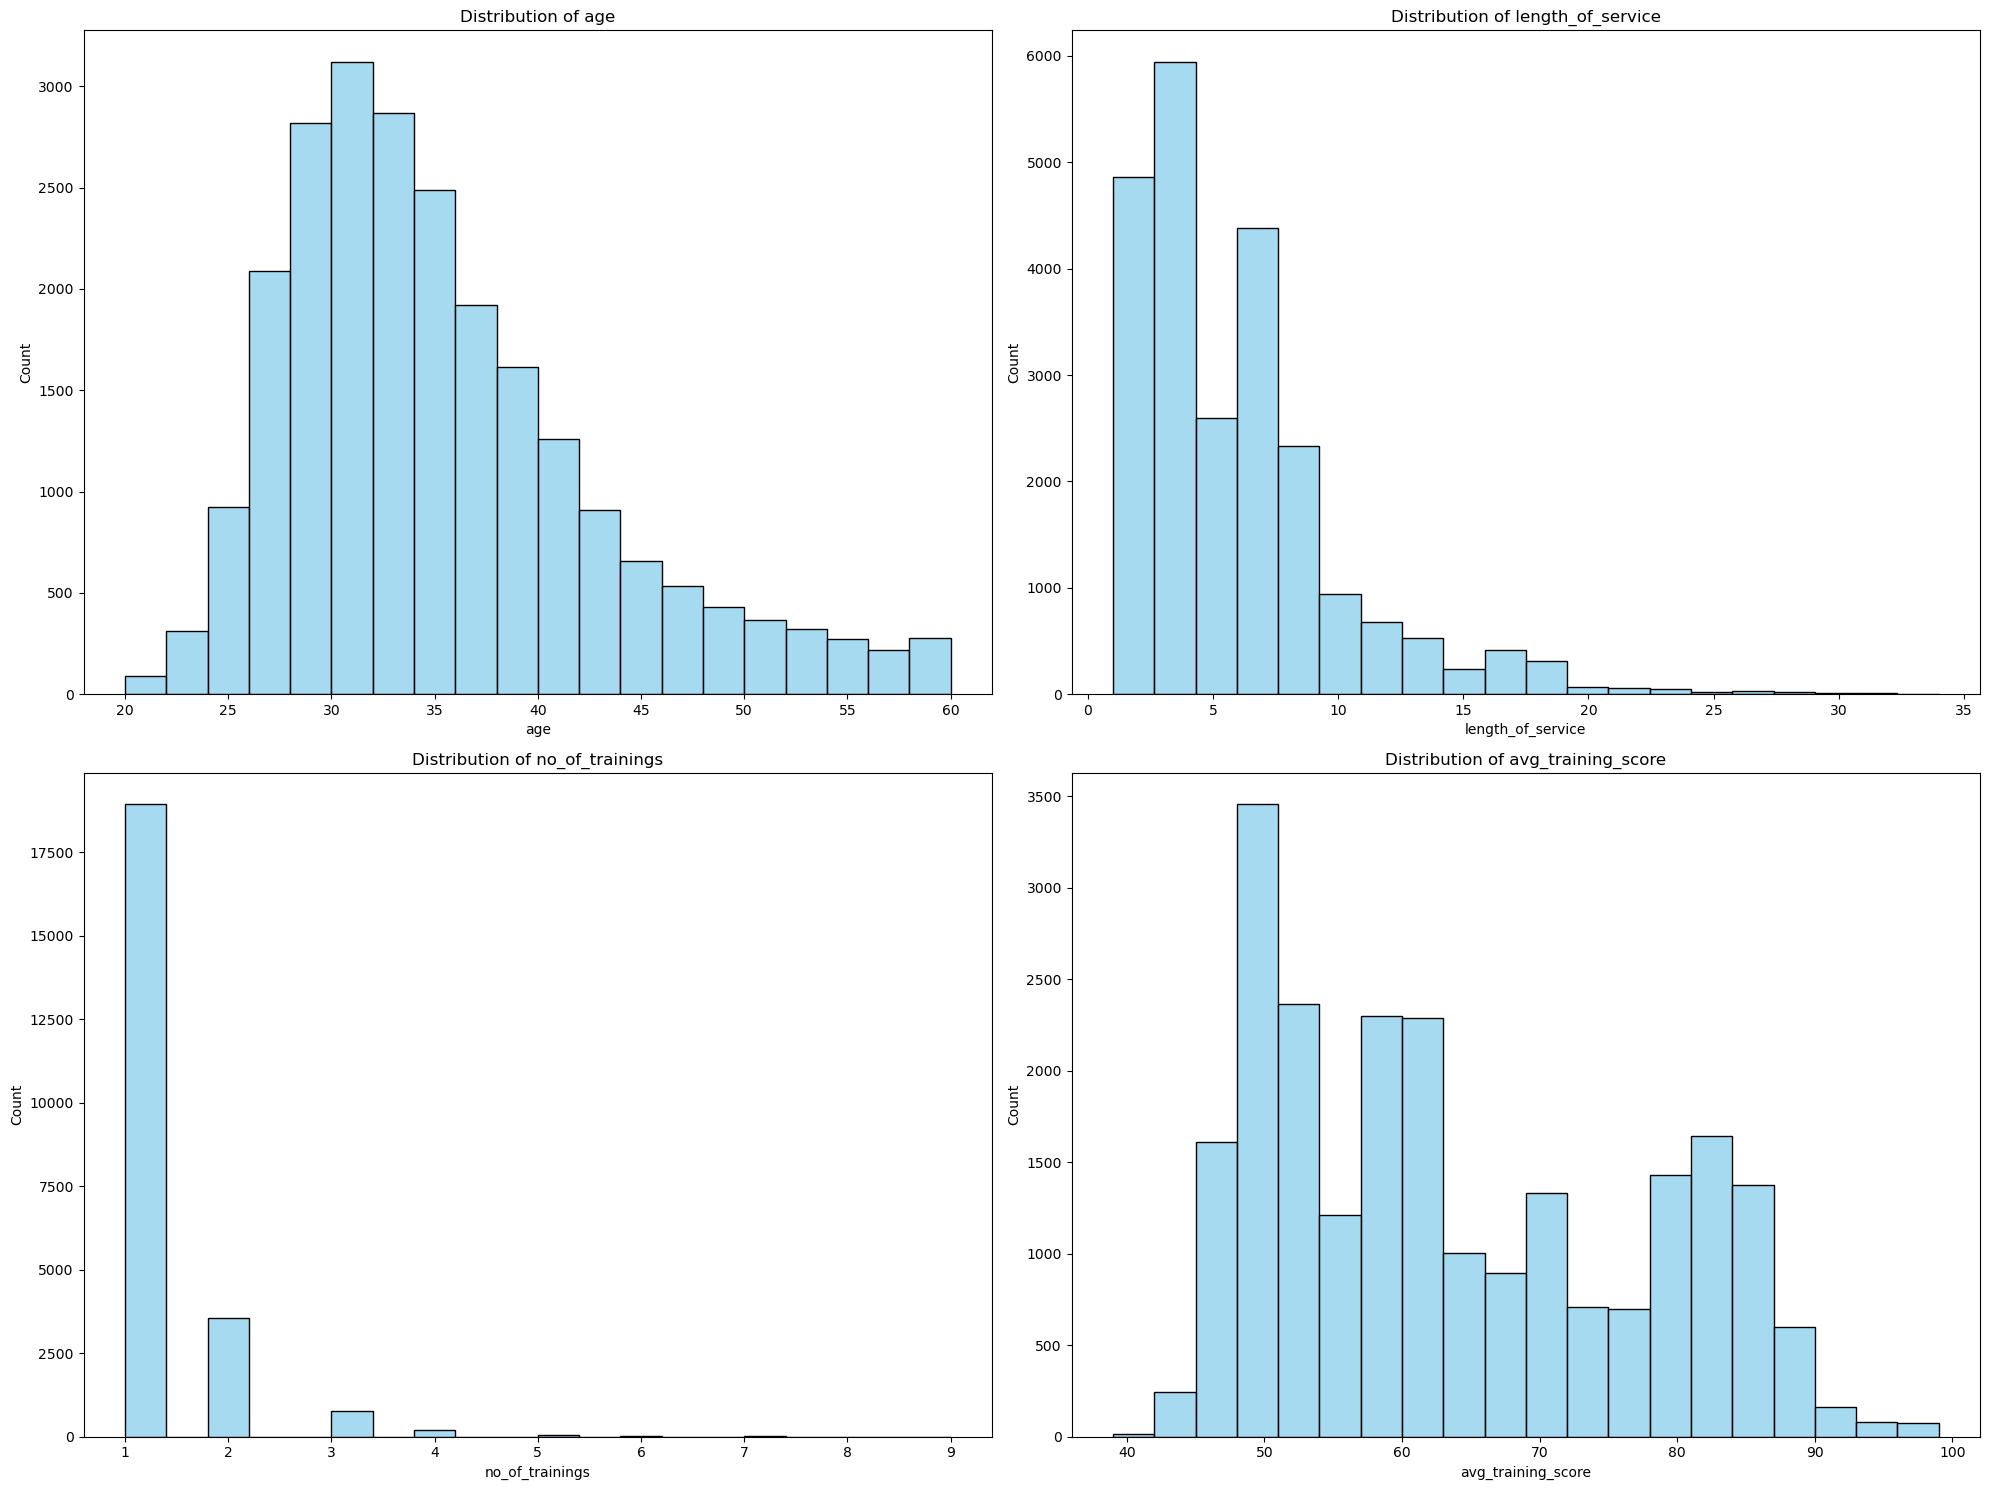

In [57]:
# -----------------------------
# 2. Numerical Variables (binned)
# -----------------------------
numerical_cols = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=False, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()